In [20]:
import numpy as np
import pandas as pd

In [21]:
df1 = pd.read_csv("email.csv")  # e.g. spam/ham
df2 = pd.read_csv("spam.csv", encoding="latin1")


df2 = df2.rename(columns={"v1": "Category", "v2": "Message"}) # renaming coloumns to match


**Stages of the project**
1. Data cleaning
2. EDA - analysis
3. Text preprosessing
4. Model building
5. Evaluaing model
6. Improvement
7. Website
8. Deploy



**1. Data cleaning**

In [22]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [23]:
df1.sample(5)

,Category,Message
3384,ham,K... Must book a not huh? so going for yoga ba...
3203,ham,Okay lor... Wah... like that def they wont let...
5039,ham,Thanks for being there for me just to talk to ...
2653,ham,No need for the drug anymore.
3404,ham,Good night my dear.. Sleepwell&amp;Take care


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    5572 non-null   object
 1   Message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [25]:
df2.sample(5)

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
3530,ham,Prepare to be pounded every night...,NaN,NaN,NaN
1443,spam,Free 1st week entry 2 TEXTPOD 4 a chance 2 win...,NaN,NaN,NaN
3978,ham,CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...,NaN,NaN,NaN
1987,ham,No calls..messages..missed calls,NaN,NaN,NaN
614,ham,I called and said all to him:)then he have to ...,NaN,NaN,NaN


In [26]:
#droping last 3 columns
df2.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [27]:
df2.sample(5)

,Category,Message
5152,ham,Idk. I'm sitting here in a stop and shop parki...
3529,ham,Tyler (getting an 8th) has to leave not long a...
4773,ham,U repeat e instructions again. Wat's e road na...
3329,ham,Send me yetty's number pls.
4896,ham,I cant pick the phone right now. Pls send a me...


In [28]:
df1["Source"] = "email"
df2["Source"] = "sms"


In [29]:
df1.sample(5)

,Category,Message,Source
4720,ham,Aiyo... Her lesson so early... I'm still sleep...,email
2587,ham,If you don't respond imma assume you're still ...,email
2378,spam,YES! The only place in town to meet exciting a...,email
1809,ham,Aiyo a bit pai seh ü noe... Scared he dun rem ...,email
3473,ham,I think I‘m waiting for the same bus! Inform m...,email


In [30]:
#combining the 2 datasets
dfc = pd.concat([df1, df2], ignore_index=True)

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dfc['Category'] = le.fit_transform(dfc['Category'])


In [32]:
dfc.head()

,Category,Message,Source
0,0,"Go until jurong point, crazy.. Available only ...",email
1,0,Ok lar... Joking wif u oni...,email
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,email
3,0,U dun say so early hor... U c already then say...,email
4,0,"Nah I don't think he goes to usf, he lives aro...",email


In [33]:
#Chekcing missing valuse from both
dfc.isnull().sum()

,0
Category,0
Message,0
Source,0


In [34]:
#Checking duplicate values
dfc.duplicated().sum()

np.int64(818)

In [35]:
#removing duplicates
dfc = dfc.drop_duplicates(keep='first')

In [36]:
dfc.duplicated().sum()

np.int64(0)

In [37]:
dfc.shape

(10327, 3)

**2. EDA**

In [38]:
#Checking the ratio of spam to ham
dfc['Category'].value_counts()

,count
Category,
0,9032
1,1294
2,1


In [39]:
#Removing a randon category 2
dfc = dfc[dfc['Category'].isin([0, 1])].copy()

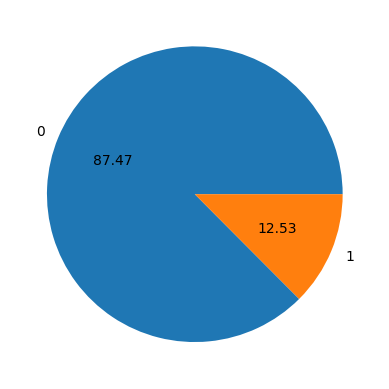

In [40]:
#To see the data ratio graphically
import matplotlib.pyplot as plt
plt.pie(dfc['Category'].value_counts(), labels=['0','1'], autopct="%0.2f")
plt.show()

In [41]:
import nltk

In [42]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [43]:
dfc['Characters']= dfc['Message'].apply(len)

In [44]:
dfc.head()

,Category,Message,Source,Characters
0,0,"Go until jurong point, crazy.. Available only ...",email,111
1,0,Ok lar... Joking wif u oni...,email,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,email,155
3,0,U dun say so early hor... U c already then say...,email,49
4,0,"Nah I don't think he goes to usf, he lives aro...",email,61


In [45]:

#number of words
dfc['Words']= dfc['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [46]:
dfc.head()

,Category,Message,Source,Characters,Words
0,0,"Go until jurong point, crazy.. Available only ...",email,111,24
1,0,Ok lar... Joking wif u oni...,email,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,email,155,37
3,0,U dun say so early hor... U c already then say...,email,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",email,61,15


In [47]:
#number of sentences
dfc['Sentences']= dfc['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [48]:
dfc.head()

,Category,Message,Source,Characters,Words,Sentences
0,0,"Go until jurong point, crazy.. Available only ...",email,111,24,2
1,0,Ok lar... Joking wif u oni...,email,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,email,155,37,2
3,0,U dun say so early hor... U c already then say...,email,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",email,61,15,1


In [49]:
dfc[['Characters','Words','Sentences']].describe()


,Characters,Words,Sentences
count,10326.000000,10326.000000,10326.000000
mean,79.040868,18.508038,1.967654
std,58.306779,13.364833,1.451965
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [50]:
#spam stats
dfc[dfc['Category']== 1] [['Characters','Words','Sentences']].describe()


#mean words and sentences higer than ham

,Characters,Words,Sentences
count,1294.000000,1294.000000,1294.000000
mean,137.508501,27.667697,2.970634
std,30.258558,7.052949,1.486439
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [51]:
#ham stats
dfc[dfc['Category']== 0] [['Characters','Words','Sentences']].describe()

,Characters,Words,Sentences
count,9032.000000,9032.000000,9032.000000
mean,70.664305,17.195748,1.823959
std,56.530767,13.540541,1.388936
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [52]:
#downsampling for demonstrating diffrences
df_ham = dfc[dfc['Category'] == 0]
df_spam = dfc[dfc['Category'] == 1]

df_ham_down = df_ham.sample(len(df_spam), random_state=42)

dfb = pd.concat([df_ham_down, df_spam], ignore_index=True)


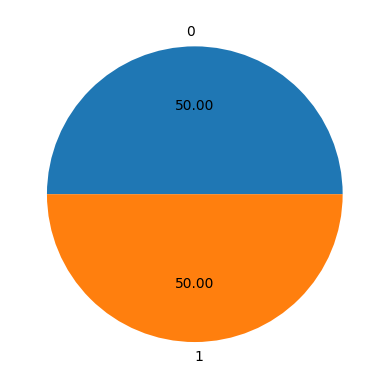

In [53]:
plt.pie(dfb['Category'].value_counts(), labels=['0','1'], autopct="%0.2f")
plt.show()

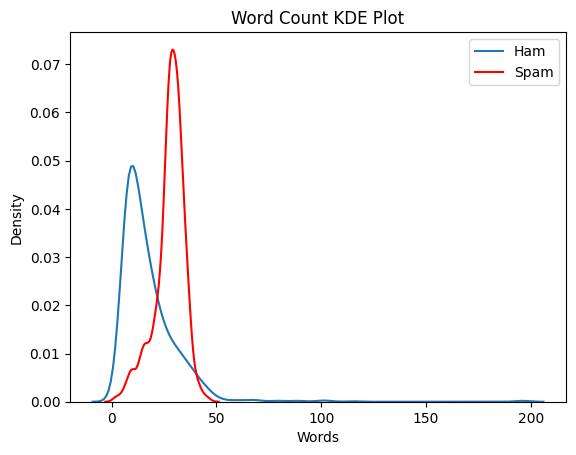

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(dfb[dfb['Category']==0]['Words'], label='Ham')
sns.kdeplot(dfb[dfb['Category']==1]['Words'], label='Spam', color='red')
plt.legend()
plt.title("Word Count KDE Plot")
plt.show()
#Spam messages tend to be longer and more uniform in length
#while ham messages are generally shorter but vary much more.

<Axes: >

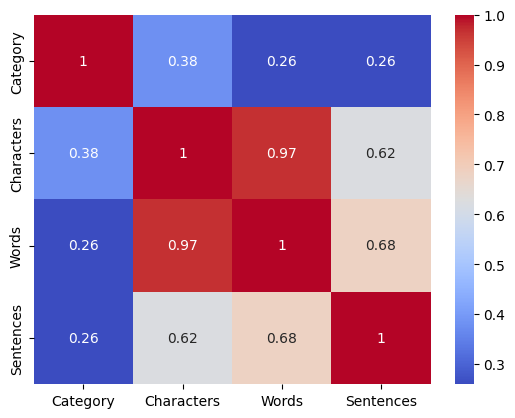

In [55]:
numeric_dfc = dfc.select_dtypes(include=['number'])
sns.heatmap(numeric_dfc.corr(), annot=True, cmap='coolwarm')
#Character length shows the strongest correlation with spam
#meaning spam messages are generally longer and more uniform than ham messages.

**3.Data Preprocesing / Text Preprocessing**


**Steps**
1.   Change to lower case
2.   Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming





In [56]:
def transform_text(text):
    text = text.lower()      #step 1 ✔️
    text = nltk.word_tokenize(text)  #step 2 ✔️

    y = []  #step 3 ✔️
    for i in text:
        if i.isalnum():
          y.append(i)

    text = y[:]
    y.clear()

    for i in text:       #step 4 ✔️
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:              #step 5 ✔️
        y.append(ps.stem(i))

    return " ".join(y)

In [57]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [58]:
transform_text("Hello there,👋! Do you like this prensentation so far? I love hearing feedbacks")

'hello like prensent far love hear feedback'

In [59]:
transform_text(dfc['Message'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [60]:
dfc['Transformed_text'] =dfc['Message'].apply(transform_text)

In [61]:
dfc.head()

,Category,Message,Source,Characters,Words,Sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",email,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,email,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,email,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,email,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",email,61,15,1,nah think goe usf live around though


In [62]:
#Make a word cloud to get the most used words in spam and ham

from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [63]:
spam_wc = wc.generate(dfc[dfc['Category']== 1]['Transformed_text'].str.cat(sep= " "))

#This line generates a word cloud using all transformed spam messages combined into one large text.

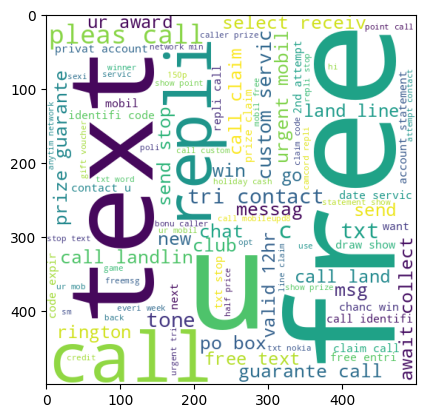

In [64]:
plt.imshow(spam_wc)

In [65]:
ham_wc = wc.generate(dfc[dfc['Category']== 0]['Transformed_text'].str.cat(sep= " "))

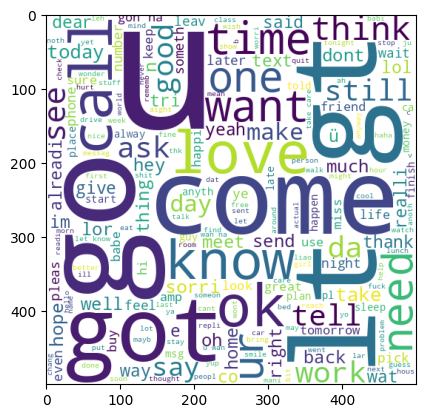

In [66]:
plt.imshow(ham_wc)

In [67]:
#Creating a dictionary to check the most common spam words
spam_words = []
for msg in dfc[dfc['Category']==1]['Transformed_text'].tolist():
  for words in msg.split():
    spam_words.append(words)

In [68]:
len (spam_words)

19720

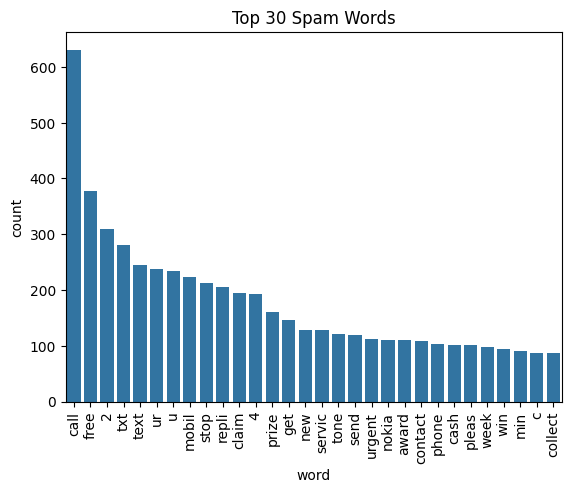

In [69]:
from collections import Counter

spam_df = pd.DataFrame(Counter(spam_words).most_common(30), columns=['word', 'count'])

# Barplot
sns.barplot(x='word', y='count', data=spam_df)
plt.xticks(rotation=90)
plt.title("Top 30 Spam Words")
plt.show()



In [70]:
#Creating a dictionary to check the most common spam words
ham_words = []
for msg in dfc[dfc['Category']==0]['Transformed_text'].tolist():
  for words in msg.split():
    ham_words.append(words)

In [71]:
dfc.head()

,Category,Message,Source,Characters,Words,Sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",email,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,email,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,email,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,email,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",email,61,15,1,nah think goe usf live around though


**4. Model Buliding**

Starting with Naive base


In [72]:
#first vectorize data using bag of words or tfidf vetorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [73]:
X = tfidf.fit_transform(dfc['Transformed_text']).toarray()

In [74]:
y= dfc['Category'].values

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [77]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [78]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [79]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8944820909970959
[[1581  214]
 [   4  267]]
0.5550935550935551


In [80]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9830590513068732
[[1793    2]
 [  33  238]]
0.9916666666666667


In [81]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9864472410454985
[[1793    2]
 [  26  245]]
0.9919028340080972


In [82]:
#TFID --> BNB

Now lets compare various ML modles to get the best one

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [84]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [85]:
#dictionary fro algos
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [86]:
#function for training and testing a classifier and giving accuracy and precision
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [87]:
accuracy_scores = []
precision_scores = []

In [88]:


#Using a lopp and checking accuracy and precision of each model
for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9811229428848015
Precision -  0.967741935483871
For  KN
Accuracy -  0.9356243949661182
Precision -  1.0
For  NB
Accuracy -  0.9830590513068732
Precision -  0.9916666666666667
For  DT
Accuracy -  0.941432720232333
Precision -  0.875
For  LR
Accuracy -  0.9666021297192643
Precision -  0.9469026548672567
For  RF
Accuracy -  0.9927395934172314
Precision -  0.9923076923076923
For  AdaBoost
Accuracy -  0.9288480154888674
Precision -  0.8780487804878049
For  BgC
Accuracy -  0.989835430784124
Precision -  0.9734848484848485
For  ETC
Accuracy -  0.994675701839303
Precision -  1.0
For  GBDT
Accuracy -  0.9559535333978703
Precision -  0.96875
For  xgb
Accuracy -  0.9757986447241046
Precision -  0.9662447257383966


In [89]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [90]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.935624,1.000000
8,ETC,0.994676,1.000000
5,RF,0.992740,0.992308
2,NB,0.983059,0.991667
7,BgC,0.989835,0.973485
9,GBDT,0.955954,0.968750
0,SVC,0.981123,0.967742
10,xgb,0.975799,0.966245
4,LR,0.966602,0.946903
6,AdaBoost,0.928848,0.878049


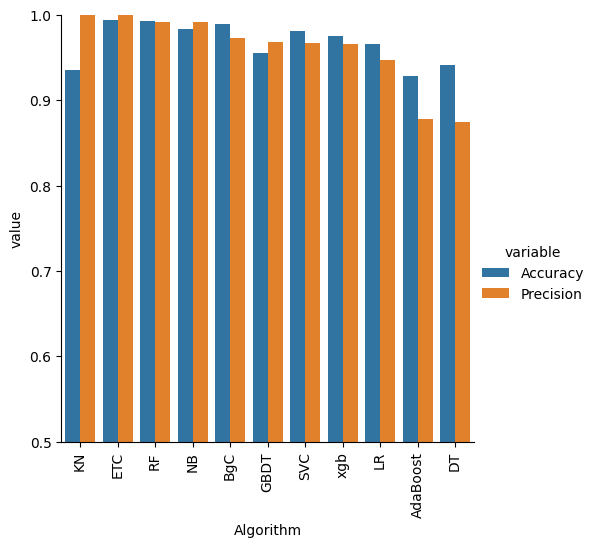

In [91]:
performance_df_melted = pd.melt(performance_df, id_vars=['Algorithm'], var_name='variable', value_name='value')
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df_melted, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

**6. Improving Model**

In [92]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import BernoulliNB

rf = RandomForestClassifier(n_estimators=100, random_state=2)
etc = ExtraTreesClassifier(n_estimators=100, random_state=2)
bnb = BernoulliNB()


In [93]:
vclf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('etc', etc),
        ('bnb', bnb)
    ],
    voting='soft'
)

In [94]:
vclf.fit(X_train, y_train)
y_pred = vclf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.995159728944821
Precision 1.0


In [95]:
from google.colab import files
uploaded = files.upload()


Saving feedback.csv to feedback.csv


In [96]:
import pandas as pd

# ------------------ LOAD DATA ------------------

# 1. Original training data
df1 = pd.read_csv("email.csv")
df2 = pd.read_csv("spam.csv", encoding="latin1")
dfc = pd.concat([df1, df2], ignore_index=True)


# ---- Try loading feedback.csv ----
try:
    feedback = pd.read_csv("feedback.csv")

    # Handle empty file
    if feedback.empty:
        feedback = None
    else:
        # Your Streamlit file uses: message, user_label, etc.
        feedback = feedback.rename(columns={
            "message": "Message",
            "user_label": "Category"
        })
        feedback = feedback[["Message", "Category"]]


except Exception as e:
    feedback = None

In [97]:

# ---- Combine ----
if feedback is not None:
    combined = pd.concat([dfc, feedback], ignore_index=True)
else:
    combined = dfc.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
combined['Category'] = le.fit_transform(combined['Category'])



In [98]:
combined = combined.drop_duplicates(keep='first')

In [99]:

combined = combined.rename(columns={"v1": "0", "v2": "1"}) # renaming coloumns to match


In [100]:

combined.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)


In [101]:
combined.head()

,Category,Message,0,1
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN


In [102]:
combined["Source"] = "email"

In [103]:
combined = combined.drop_duplicates(keep='first')

In [104]:
import nltk

In [105]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [106]:
combined['Characters']= combined['Message'].astype(str).apply(len)

In [107]:
combined['Message'] = combined['Message'].astype(str) # Ensure all messages are strings

combined['Words']= combined['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
combined['Sentences']= combined['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
combined[['Characters','Words','Sentences']].describe()

combined['Transformed_text'] =combined['Message'].apply(transform_text)

In [111]:
combined.head()

,Category,Message,Source,Characters,Words,Sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",email,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,email,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,email,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,email,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",email,61,15,1,nah think goe usf live around though


In [108]:
import pickle
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Assign the desired trained model to 'model'
model = bnb # Assuming bnb is the intended model based on previous steps

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)